# Data Preprocessing

In [330]:
import csv
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.rcParams.update({'font.size': 22})

### Generic Preprocessing

Create dataframe from raw wILI time series.

In [331]:
flu_dir = 'flu_ground_truth/'
filename = 'wILI_cleaned_Alabama.csv'
with open(flu_dir + filename, 'r') as f:
    weeks = [row.split(',')[0] for row in f][1:]
week2cnt = {weeks[i]: i for i in range(len(weeks))}
cnt2week = {v: k for k, v in week2cnt.items()}

In [332]:
week_num = [int(week.split('-')[1]) for week in weeks]

In [333]:
# create dictionary that maps each state to the corresponding wILI time series
location2info = {}
for filename in os.listdir(flu_dir):
    location = filename.replace('.csv', '').split('_')[-1]
    with open(flu_dir + filename, 'r') as f:
        rows = list(csv.reader(f))
        time2wili = {row[0]: float(row[1]) for row in rows[1:]}
        location2info[location] = time2wili

In [334]:
# convert the dictionary to a dataframe
df = pd.DataFrame.from_dict(location2info)

In [335]:
df.rename(index=week2cnt, inplace=True)
df.sort_index(inplace=True)

In [336]:
# ignore the following locations
df_51 = df.drop(columns=['Virgin Islands', 'Puerto Rico', 'New York City'])

In [337]:
df_51.head()

,Texas,Louisiana,Washington,New Jersey,Arkansas,Montana,North Dakota,Nebraska,New Mexico,Indiana,California,Ohio,South Carolina,Rhode Island,Michigan,Georgia,Wyoming,Hawaii,New Hampshire,Maryland,Mississippi,Connecticut,West Virginia,Iowa,Illinois,Vermont,Tennessee,Missouri,Wisconsin,North Carolina,Pennsylvania,Kentucky,Delaware,Kansas,Oregon,Massachusetts,Alabama,Alaska,Arizona,Minnesota,Maine,Nevada,Idaho,Utah,Virginia,New York,District of Columbia,Oklahoma,South Dakota,Colorado
0,2.06514,2.28108,0.510041,2.31534,0.696056,0.037119,0.671355,2.199780,2.13191,0.518962,1.95412,0.228257,0.446127,0.235036,0.671831,1.60490,0.632911,1.029340,0.075930,1.31920,2.90980,0.078309,1.59741,0.563063,1.28205,1.47641,0.274655,1.101760,0.465022,0.531430,0.703292,0.142932,0.100125,0.442227,0.551334,0.604621,2.13477,0.875146,0.674721,0.574800,0.357724,1.66683,0.414938,0.747696,1.14343,0.262990,2.80877,0.624179,1.102750,0.660684
1,2.09394,2.04776,1.040070,2.47836,0.674157,0.180963,0.721961,2.735320,1.96350,0.653137,2.15266,0.361628,0.765523,0.201545,0.585011,1.71307,0.440621,1.752460,0.092464,2.09879,2.97075,0.238095,1.58968,0.860956,1.45089,1.35777,0.499492,0.930521,0.581832,0.536530,0.910726,0.223975,0.368550,0.577490,0.624076,0.887866,2.05999,1.128270,0.749939,0.541293,0.434855,1.63633,1.457980,0.410939,1.23653,0.369729,2.89079,0.958678,0.793794,0.628621
2,2.10072,2.42974,0.904393,2.24812,0.514217,0.185874,0.567477,3.311030,1.67486,0.584346,2.24173,0.523560,0.389430,0.362845,0.524238,2.01249,0.441798,0.755124,0.293610,1.45439,2.98141,0.374158,1.52672,0.407000,1.56607,1.48221,0.499550,0.989890,1.188220,0.457107,0.881081,0.156152,0.337025,0.479750,0.484848,0.744806,1.94224,0.586042,0.953365,0.521162,0.421743,1.50860,1.408140,0.440583,1.22545,0.362121,2.41042,2.070390,0.791023,0.804020
3,2.20655,1.92854,0.955110,2.79286,0.413650,0.036390,0.339239,2.057610,2.35498,0.581084,1.91748,0.329518,0.418354,0.322675,0.921435,2.38747,0.490305,1.574340,0.178795,1.26769,3.14804,0.333542,1.81171,0.183225,1.45762,1.44393,0.401638,0.959713,1.010490,0.511163,0.721180,0.150108,0.460494,0.538071,0.751771,0.783721,2.27650,0.967742,0.888804,0.637716,0.338409,2.14451,1.280070,0.755957,1.26902,0.358981,3.11632,1.670730,0.801311,0.909658
4,2.36381,2.80934,0.786370,1.82877,1.090280,0.040519,0.713749,0.376712,2.37983,0.842254,2.52326,0.831798,0.445310,0.530256,0.863417,2.65614,0.566636,1.773980,0.294372,1.45386,3.35570,0.396743,1.83986,0.358780,1.48930,1.25276,0.528096,1.167680,1.096490,0.649925,0.991455,0.289678,0.222332,0.481289,0.764895,0.812421,2.83371,0.683851,1.185730,0.805802,0.176471,1.76761,1.827240,0.651859,1.26547,0.527357,2.99118,1.628450,0.779833,0.971705


A small subset of the values in the wILI time series are equal to 0.000100. In the context of the individual time series, it's clear that this value is essentially a missing value. Some states don't have any occurances of this special value while others (usually smaller states such as Montana and North Dakota and Delaware) have dozens of occurances of this value. To address this issue, we decided to impute these missing values for any state whose time series had at least one missing value. Initially, we tried fitting a GAM to the values in each time series that are not missing, but this produced horrible predictions for those weeks with missing values. Next, we tried filling in a given state's missing values with the average of the values of the state's neighbors for the same week, but this also produced bad imputations. Finally, we fit a Gaussian process regression model using the values that weren't missing for each time series and predicted the weeks that had missing values. (Note: because wILI values must be nonnegative, any negative prediction from the Gaussian process was considered as a wILI rate of 0.0.) This resulted in plausible imputations as illustrated in the plot below.

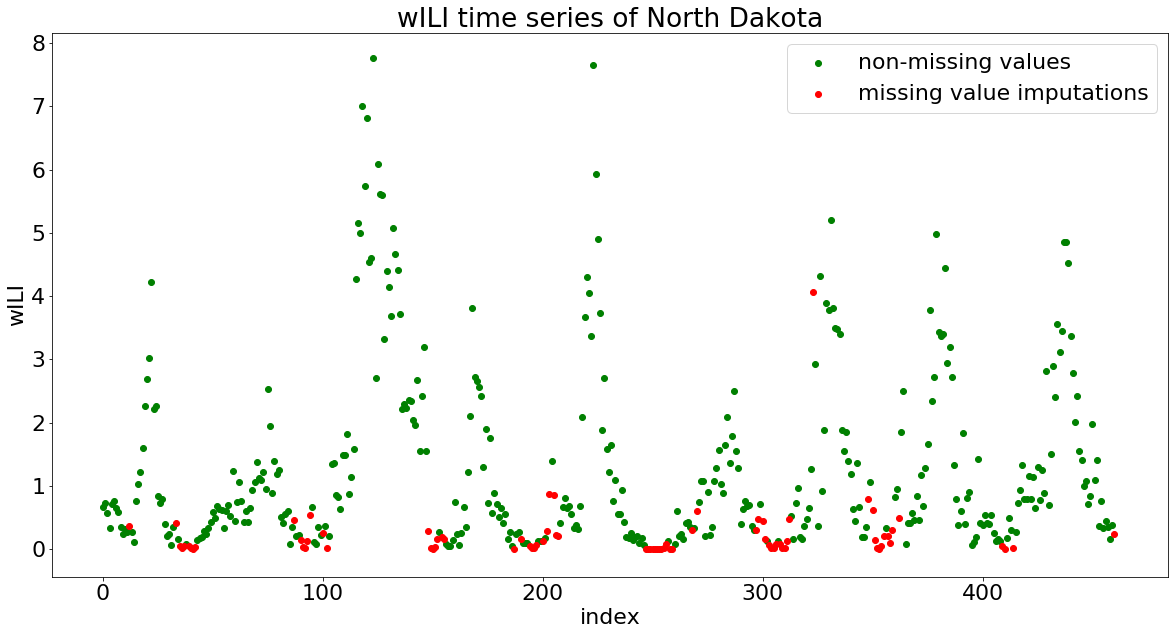

In [454]:
df_51_imputed = df_51.copy()
na_val = 0.0001
indices = np.array(df_51.index)
for state in df_51.columns:
    X = indices.copy()
    y = np.array(df[state])
    missing_indices = np.argwhere(y == na_val).flatten()
    if len(missing_indices):
        X_train = np.delete(X, missing_indices)
        y_train = np.delete(y, missing_indices)
        
        gpr = GPR().fit(X_train.reshape(-1, 1), y_train)
        y_preds = gpr.predict(missing_indices.reshape(-1, 1))
        y_preds = [max(0.0, y_pred) for y_pred in y_preds]
        
        for i, missing_index in enumerate(missing_indices):
            df_51_imputed.iloc[missing_index][state] = y_preds[i]  
        
        if state == 'North Dakota':
            plt.figure(figsize=(20, 10))
            plt.scatter(X_train, y_train, color='g', label='non-missing values')
            plt.scatter(missing_indices, y_preds, color='r', label='missing value imputation')
            plt.xlabel('index')
            plt.ylabel('wILI')
            plt.title('wILI time series of ' + state)
            plt.legend()
            plt.show()

In [339]:
# create dataframe for use in RNN models
states_imputed_df = pd.DataFrame(columns=['time', 'wili', 'state'])
for state in df_51_imputed.columns:
    d = {'time': [cnt2week[cnt] for cnt in df_51_imputed.index], 
         'wili': df_51_imputed[state],
         'state': [state] * obs_num}
    new_df = pd.DataFrame.from_dict(d)
    states_imputed_df = states_imputed_df.append(new_df)
    
states_imputed_df.to_csv('flu_ground_truth_imputed.csv', index_label=False)

### Preprocessing for Bayesian Model

In [340]:
# limit analysis to Lower 48 states
df_48_imputed = df_51_imputed.drop(columns=['Alaska', 'Hawaii', 'District of Columbia'])

In [ ]:
abbrev2state = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

state2abbrev = {v: k for k, v in abbrev2state.items()}

In [341]:
df_48_imputed.columns = [state2abbrev[state] for state in df_48_imputed.columns]

In [345]:
# calculate the absolute change in the weekly wILI rate for each state. This reduces the number of rows in the 
# dataframe by 1
flu_change_df = pd.DataFrame()
for state in df_48_imputed.columns:
    wili_vals = df_48_imputed[state]
    flu_change_df[state] = [abs(wili_vals[i+1] - wili_vals[i]) for i in range(len(wili_vals) - 1)]

flu_change_df.head()

,TX,LA,WA,NJ,AR,MT,ND,NE,NM,IN,CA,OH,SC,RI,MI,GA,WY,NH,MD,MS,CT,WV,IA,IL,VT,TN,MO,WI,NC,PA,KY,DE,KS,OR,MA,AL,AZ,MN,ME,NV,ID,UT,VA,NY,OK,SD,CO
0,0.02880,0.23332,0.530029,0.16302,0.021899,0.143844,0.050606,0.535540,0.16841,0.134175,0.19854,0.133371,0.319396,0.033491,0.086820,0.10817,0.192290,0.016534,0.77959,0.06095,0.159786,0.00773,0.297893,0.16884,0.11864,0.224837,0.171239,0.116810,0.005100,0.207434,0.081043,0.268425,0.135263,0.072742,0.283245,0.07478,0.075218,0.033507,0.077131,0.030500,1.043042,0.336757,0.09310,0.106739,0.334499,0.308956,0.032063
1,0.00678,0.38198,0.135677,0.23024,0.159940,0.004911,0.154484,0.575710,0.28864,0.068791,0.08907,0.161932,0.376093,0.161300,0.060773,0.29942,0.001177,0.201146,0.64440,0.01066,0.136063,0.06296,0.453956,0.11518,0.12444,0.000058,0.059369,0.606388,0.079423,0.029645,0.067823,0.031525,0.097740,0.139228,0.143060,0.11775,0.203426,0.020131,0.013112,0.127730,0.049840,0.029644,0.01108,0.007608,1.111712,0.002771,0.175399
2,0.10583,0.50120,0.050717,0.54474,0.100567,0.149484,0.228238,1.253420,0.68012,0.003262,0.32425,0.194042,0.028924,0.040170,0.397197,0.37498,0.048507,0.114815,0.18670,0.16663,0.040616,0.28499,0.223775,0.10845,0.03828,0.097912,0.030177,0.177730,0.054056,0.159901,0.006044,0.123469,0.058321,0.266923,0.038915,0.33426,0.064561,0.116554,0.083334,0.635910,0.128070,0.315374,0.04357,0.003140,0.399660,0.010288,0.105638
3,0.15726,0.88080,0.168740,0.96409,0.676630,0.004129,0.374510,1.680898,0.02485,0.261170,0.60578,0.502280,0.026956,0.207581,0.058018,0.26867,0.076331,0.115577,0.18617,0.20766,0.063201,0.02815,0.175555,0.03168,0.19117,0.126458,0.207967,0.086000,0.138762,0.270275,0.139570,0.238162,0.056782,0.013124,0.028700,0.55721,0.296926,0.168086,0.161938,0.376900,0.547170,0.104098,0.00355,0.168376,0.042280,0.021478,0.062047
4,0.15397,0.72357,0.280870,0.37433,0.107080,0.203383,0.044361,2.584368,0.00223,0.090199,0.22236,0.313788,0.065790,0.052853,0.056778,0.75691,0.103300,0.010042,0.03227,0.57525,0.077181,0.22889,0.059880,0.06462,0.12571,0.065608,0.056060,0.062660,0.173063,0.042315,0.066683,0.572328,0.243704,0.010410,0.079490,0.62853,0.240393,0.014318,0.180151,0.962371,0.332900,0.012041,0.14618,0.022601,0.946080,0.036409,0.252690


For the Bayesian model, we don't want to use the wILI data in its raw form. Instead, we want to calculate the percent change in the wILI rate between consecutive weeks. The reasons for this is explained in the notebook that discusses the Bayesian model.

There are two main issues with modelling the percent change in the weekly wILI rates. The first issue is that during the summer months, the wILI rates are generally low, often times close to zero. This means that relatively small changes in the wILI rate can produce massive percent changes (i.e. changing from 0.005 to 0.1 represents an increase of 1900%, while decrease from 0.1 to 0.005 represents a decrease of 95%). These huge spikes, which only reflect minor fluctuations in the wILI rates, can obviously interfere with the inference of the model. Secondly, most of the information that can be used to determine which states are most correlated and which features account for this correlation is confined to the colder months of the year when the wILI rates change significantly on a weekly basis. On the other hand, because the wILI rates are relatively low during the warmer months of the year, these isn't much insight that can be gained during these months. This means that training the model on this data would distract the model from focusing on the informative colder months and could even prevent the model from learning the true correlations if the small fluctuations during the warmer months happen to contradict the true signal during the flu season. Therefore, to avoid these two problems, it makes sense to train the model only on the wILI rates during the flu season. 

One way to decide which weeks of the time series to exclude from the model is to inspect the mean absolute change in the wILI rates of all states during each week. The higher this mean absolute change, the more the wILI rates are varying and the more information about the interstate correlations is present in the data, and vice versa. The plot below displays the mean absolute change in the wILI rates for each week of the time series. The red line signifies a value of 0.25, while the green dashed lines denote where the mean absolute change drops below and rises above this 0.25 threshold. All weeks where the metric is above this 0.25 threshold are included in the model, while those weeks that are below the threshold are excluded. The plot clearly illustrates why a value of 0.25 is a reasonable threshold. 

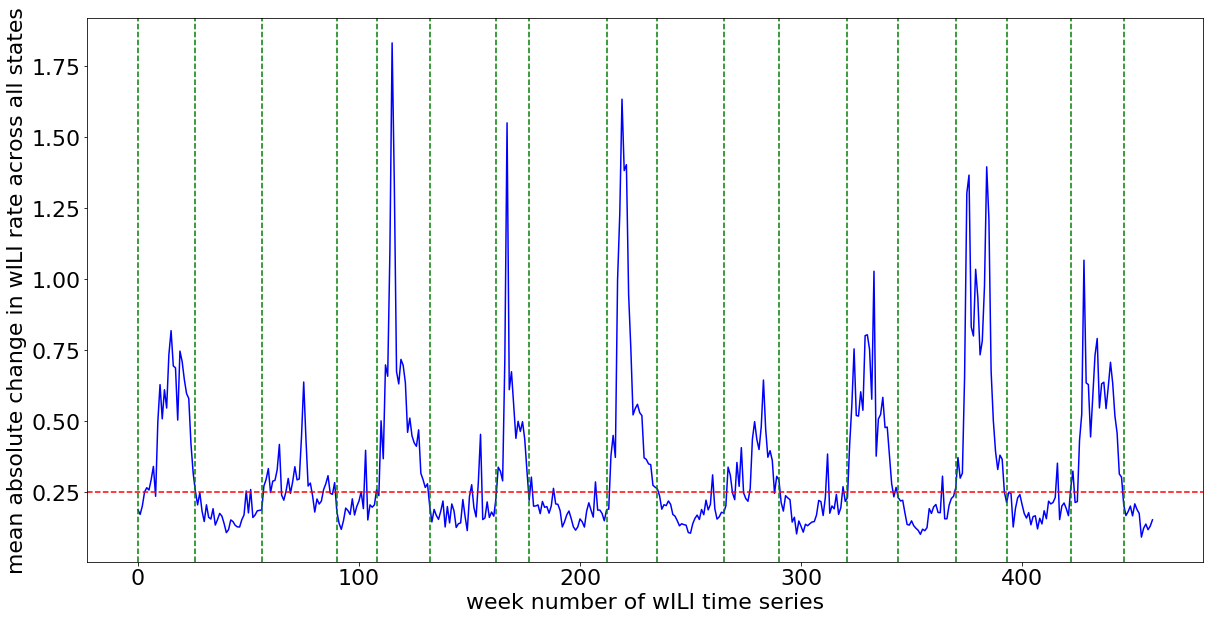

In [453]:
changes = flu_change_df.apply(np.mean, axis=1)
plt.figure(figsize=(20, 10))
cutoffs = [(0, 26), (56, 90), (108, 132), (162, 177), (212, 235), (265, 290), (321, 344), (370, 393),
          (422, 446)]
plt.plot(changes, color='b')
plt.axhline(y=0.25, color='r', linestyle='--')

for lower_cutoff, upper_cutoff in cutoffs:
    plt.axvline(x=lower_cutoff, color='g', linestyle='--')
    plt.axvline(x=upper_cutoff, color='g', linestyle='--')
plt.xlabel('week number of wILI time series')
plt.ylabel('mean absolute change in wILI rate across all states')
plt.show()

In [346]:
# calculate the percent change in the weekly wILI rate for each state
flu_percent_change_df = pd.DataFrame()
for state in df_48_imputed.columns:
    wili_vals = df_48_imputed[state]
    flu_percent_change_df[state] = [(wili_vals[i+1] - wili_vals[i]) / wili_vals[i] 
                                    for i in range(len(wili_vals) - 1)]

In [374]:
# identify the weeks of the time series to include in the model based on the dashed green lines in the plot above
indices_to_keep = []
for lower_cutoff, upper_cutoff in cutoffs:
    indices_to_keep.extend(list(range(lower_cutoff, upper_cutoff)))   
original_flu_keep_df = df_48_imputed.iloc[indices_to_keep]

Limiting the analysis to the weeks with a significant average change in wILI rates reduced the number of entries in the percent change dataframe that were either very inflated (i.e. greater than 500%) or very deflated (i.e. lower than -90%) by around 96%. While this was encouraging, we still had to handle the several extreme entries that remained. Each of the tuples displayed below contains two consecutive values of the raw wILI time series, where the percent change between the two values exceeds either 500% or -90%. Comparing these value to those imputed above reveals that the wILI values that lead to these issues are overwhelmingly those filled in by the Gaussian process model and are therefore inherently unreliable. Therefore, we wouldn't be distorting the original data by changing these values. Because these extreme values comprised just 28 out of the 10199 entries in the percent change dataframe, we used a simple imputation technique that shouldn't have a significant impact on the model -- we simply replaced the extreme entries in the percent change dataframe with the mean percent change of all the other non-extreme entries for the given week. 

In [505]:
flu_percent_change_keep_df = flu_percent_change_df.iloc[indices_to_keep]

lower_threshold = -0.9
upper_threshold = 5
for state in flu_percent_change_keep_df.columns:
    percent_change_lst = list(flu_percent_change_keep_df[state])
    for i in range(len(percent_change_lst)):
        if percent_change_lst[i] > upper_threshold or percent_change_lst[i] < lower_threshold:
            print(tuple(original_flu_keep_df[state])[i:i+2])

(0.387097, 2.45902)
(0.0733138, 0.0001)
(0.0001, 0.160686)
(0.0405186, 0.243902)
(0.537057, 0.0380518)
(0.177148, 0.0001)
(0.0001, 0.120289)
(0.119522, 0.01029353610334331)
(0.01029353610334331, 0.00027311239323040554)
(0.18315, 1.22505)
(0.0272926, 0.569544)
(0.0484027, 0.0001)
(0.118133, 0.768808)
(0.358852, 4.31548)
(0.376712, 2.96108)
(0.2589, 3.3744)
(0.007898065668536881, 0.0001)
(0.0001, 0.0350877)
(0.0679964, 0.583759)
(0.0947867, 0.0001)
(0.0001, 1.38699)
(0.149589, 0.0001)
(0.0001, 0.115785)
(0.026368750683239132, 0.0021667305527366095)
(0.0021667305527366095, 0.239349)
(0.0641643, 0.658307)
(0.0514536, 0.410722)
(0.195122, 1.45081)


In [440]:
# for each extreme value, impute the mean percent change of all the other states for the same week
cnt = 0
flu_percent_change_keep_imputed_df = flu_percent_change_keep_df.copy()
for state in flu_percent_change_keep_imputed_df:
    for index in flu_percent_change_keep_imputed_df.index:
        percent_change = flu_percent_change_keep_imputed_df.loc[index][state]
        if percent_change < lower_threshold or percent_change > upper_threshold:
            other_states_percent_change = flu_percent_change_keep_imputed_df.loc[index].drop(state)
            other_states_percent_change = [x for x in other_states_percent_change
                                           if lower_threshold < x < upper_threshold]
            flu_percent_change_keep_imputed_df.loc[index][state] = np.mean(other_states_percent_change)
            cnt += 1

print('number of entries changed:', cnt)

number of entries changed: 28


In [451]:
flu_percent_change_keep_imputed_df['week_num'] = np.array(week_num)[np.array(indices_to_keep)]
flu_percent_change_keep_imputed_df.to_csv('flu_percent_change_imputed_48.csv', index_label=False)

In [240]:
df_48_imputed['week_num'] = week_num
df_48_imputed.to_csv('flu_ground_truth_imputed_48.csv', index_label=False)